In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from torchxrayvision.torchxrayvision import datasets as DS

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import array
color = sns.color_palette()

%matplotlib inline

In [3]:
from skimage.transform import resize
from skimage.color import gray2rgb

def make_same_size(img):
    resized_image = resize(img[0], (299, 299))
    return resized_image

In [4]:
all_data = DS.COVID19_Dataset(transform=make_same_size, data_aug=gray2rgb)
all_data

{'ARDS': {0.0: 163, 1.0: 14},
 'Bacterial Pneumonia': {0.0: 160, 1.0: 17},
 'COVID-19': {0.0: 52, 1.0: 125},
 'Chlamydophila': {0.0: 176, 1.0: 1},
 'Fungal Pneumonia': {0.0: 164, 1.0: 13},
 'Klebsiella': {0.0: 176, 1.0: 1},
 'Legionella': {0.0: 175, 1.0: 2},
 'MERS': {0.0: 177},
 'No Finding': {0.0: 175, 1.0: 2},
 'Pneumocystis': {0.0: 164, 1.0: 13},
 'Pneumonia': {0.0: 2, 1.0: 175},
 'SARS': {0.0: 161, 1.0: 16},
 'Streptococcus': {0.0: 164, 1.0: 13},
 'Viral Pneumonia': {0.0: 36, 1.0: 141}}


COVID19_Dataset num_samples=177 views=['PA']

In [5]:
all_data[10]['lab']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
      dtype=float32)

In [6]:
print(all_data[0]['lab'].shape)

(14,)


In [7]:
data_len = len(all_data)

dataset_np_X = np.zeros((data_len, 299, 299, 3))
dataset_np_Y = np.zeros((data_len,14))

In [8]:
# Go through all the covid cases. The label for these cases will be 1
for i in range(data_len):
    entry = all_data[i]
    
    dataset_np_X[i] = entry['PA']
    dataset_np_Y[i] = entry['lab']
    if(entry['lab'][-4] == 0):
        print(entry['lab'])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
dataset_np_Y

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

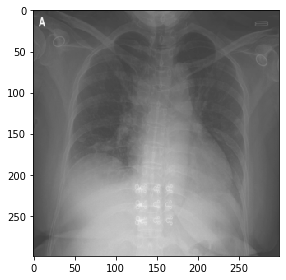

In [10]:
from skimage import data, io

io.imshow(dataset_np_X[4])

### Building Model

In [11]:
pip install tf-explain

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [14]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#model.summary()
model_def_str = model.to_json()

import json

model_dict = json.loads(model_def_str)
model_dict['config']['layers'][-1]['config']['units'] = 14

new_model = tf.keras.models.model_from_json(json.dumps(model_dict))
new_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### Images

In [15]:
dataset_np_X

array([[[[0.99215686, 0.99215686, 0.99215686],
         [0.8581174 , 0.8581174 , 0.8581174 ],
         [0.70643321, 0.70643321, 0.70643321],
         ...,
         [0.28241196, 0.28241196, 0.28241196],
         [0.27005705, 0.27005705, 0.27005705],
         [0.25496098, 0.25496098, 0.25496098]],

        [[0.99215686, 0.99215686, 0.99215686],
         [0.85051479, 0.85051479, 0.85051479],
         [0.70245262, 0.70245262, 0.70245262],
         ...,
         [0.28235294, 0.28235294, 0.28235294],
         [0.26970293, 0.26970293, 0.26970293],
         [0.25098039, 0.25098039, 0.25098039]],

        [[0.99215686, 0.99215686, 0.99215686],
         [0.86531576, 0.86531576, 0.86531576],
         [0.72539183, 0.72539183, 0.72539183],
         ...,
         [0.28940914, 0.28940914, 0.28940914],
         [0.26970293, 0.26970293, 0.26970293],
         [0.25098039, 0.25098039, 0.25098039]],

        ...,

        [[0.98833366, 0.98833366, 0.98833366],
         [0.63790412, 0.63790412, 0.63790412]

In [16]:
train_data, valid_data, train_labels, valid_labels = train_test_split(dataset_np_X, dataset_np_Y, test_size=0.10, random_state=42)


In [17]:
train_labels.shape

(159, 14)

In [18]:
batch_size = 25
nb_epochs = 50

In [19]:
new_model.compile(
    optimizer='adagrad', 
    loss='mean_squared_error', 
    metrics=['accuracy']
)

In [20]:
train_data[18].shape

(299, 299, 3)

In [21]:
train_labels

array([[0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [22]:
valid_data.shape

(18, 299, 299, 3)

In [23]:
valid_labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 0

In [ ]:
history = new_model.fit(x=train_data, y=train_labels, validation_data = (valid_data , valid_labels), epochs=nb_epochs)

Train on 159 samples, validate on 18 samples
Epoch 1/50
159/159 [==============================] - 122s 765ms/sample - loss: 0.1487 - accuracy: 0.0881 - val_loss: 0.1911 - val_accuracy: 0.1667
Epoch 2/50
159/159 [==============================] - 118s 740ms/sample - loss: 0.1286 - accuracy: 0.1132 - val_loss: 0.1908 - val_accuracy: 0.1667
Epoch 3/50
159/159 [==============================] - 116s 732ms/sample - loss: 0.1198 - accuracy: 0.1006 - val_loss: 0.1905 - val_accuracy: 0.1667
Epoch 4/50
159/159 [==============================] - 118s 744ms/sample - loss: 0.1154 - accuracy: 0.1887 - val_loss: 0.1901 - val_accuracy: 0.1667
Epoch 5/50
159/159 [==============================] - 118s 739ms/sample - loss: 0.1131 - accuracy: 0.1950 - val_loss: 0.1898 - val_accuracy: 0.1667
Epoch 6/50
159/159 [==============================] - 116s 729ms/sample - loss: 0.1122 - accuracy: 0.2075 - val_loss: 0.1894 - val_accuracy: 0.1667
Epoch 7/50
159/159 [==============================] - 116s 732ms/sa

In [ ]:
new_model.predict(valid_data)

In [ ]:
valid_labels

In [ ]:
model_json = new_model.to_json()
with open("Xception_2_50.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model.save_weights("Xception_2_50.h5")
print("Saved model to disk")

### valid_check = 